<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *3*: *Regresi***

###**Tenggat Waktu: 18 November 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **18 November 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Ichsanul Amal"
KELAS = "C"
NPM = "1906353454"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    """
    https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c
    https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
    https://scikit-learn.org/stable/modules/preprocessing.html
    https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0
    https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn
    https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression
    https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati
    """
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Ichsanul Amal dari kelas C dengan NPM 1906353454, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Ichsanul Amal)


## **Preprocessing**

### Nomor 1
[10] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [4]:
cancer_df = pd.read_csv("cancer_reg.csv")
cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1


In [5]:
cancer_df.shape

(3047, 36)

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [7]:
cancer_df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,1.467017,2.084345
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,0.498993,0.737185
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,1.000000,2.000000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,1.000000,2.000000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2.000000,3.000000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,2.000000,3.000000


In [8]:
# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(cancer_df)


                         Total   Percent
PctSomeCol18_24           2285  0.749918
PctPrivateCoverageAlone    609  0.199869
PctEmployed16_Over         152  0.049885


In [9]:
# Cek data duplicate
cancer_df.duplicated().sum()

0

In [10]:
data = cancer_df.select_dtypes(exclude="object")

# Cek outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

avgAnnCount                461
avgDeathsPerYear           349
TARGET_deathRate            64
incidenceRate               93
medIncome                  122
popEst2015                 412
povertyPercent              69
studyPerCap                504
MedianAge                   93
MedianAgeMale               89
MedianAgeFemale             78
AvgHouseholdSize           201
PercentMarried              68
PctNoHS18_24                69
PctHS18_24                  52
PctSomeCol18_24             31
PctBachDeg18_24             94
PctHS25_Over                31
PctBachDeg25_Over           82
PctEmployed16_Over          20
PctUnemployed16_Over        68
PctPrivateCoverage          21
PctPrivateCoverageAlone      4
PctEmpPrivCoverage           9
PctPublicCoverage           18
PctPublicCoverageAlone      36
PctWhite                   174
PctBlack                   395
PctAsian                   323
PctOtherRace               297
PctMarriedHouseholds       100
BirthRate                  164
TARGET_l

Cek korelasi

<ipython-input-11-c807b72220f3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(ax=ax,data=corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


<AxesSubplot:>

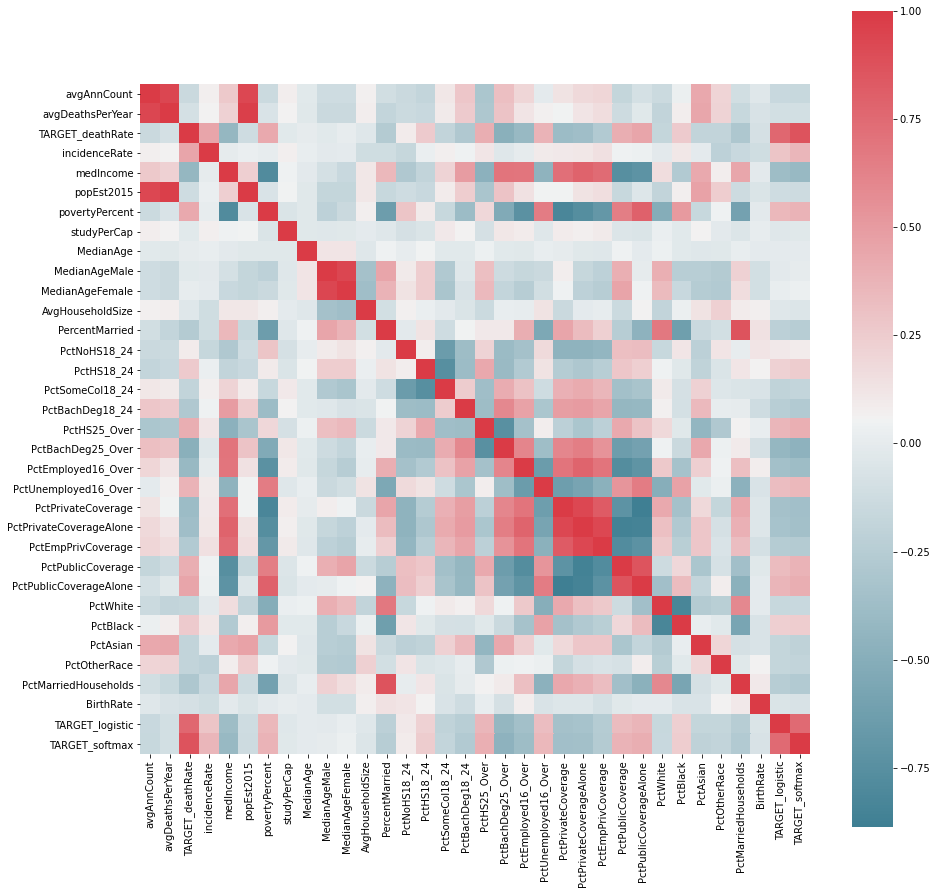

In [11]:
corr = cancer_df.corr()
fig,ax = plt.subplots(1, figsize=(15,15))
sns.heatmap(ax=ax,data=corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

### Nomor 2
[5] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil regresi yang maksimal.

In [12]:
# # Mengisi missing value dengan median
# cancer_df.fillna(cancer_df.median(), inplace=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(cancer_df[['PctSomeCol18_24','PctPrivateCoverageAlone', 'PctEmployed16_Over']])
cancer_df[['PctSomeCol18_24','PctPrivateCoverageAlone', 'PctEmployed16_Over']] = imputer.transform(cancer_df[['PctSomeCol18_24','PctPrivateCoverageAlone', 'PctEmployed16_Over']])
cancer_df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,1,1
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,1,1
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,1,1
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,1,2


Melihat data bukan numerik

In [13]:
cancer_df.select_dtypes(include="object")

,binnedInc,Geography
0,"(61494.5, 125635]","Kitsap County, Washington"
1,"(48021.6, 51046.4]","Kittitas County, Washington"
2,"(48021.6, 51046.4]","Klickitat County, Washington"
3,"(42724.4, 45201]","Lewis County, Washington"
4,"(48021.6, 51046.4]","Lincoln County, Washington"
...,...,...
3042,"(45201, 48021.6]","Ellsworth County, Kansas"
3043,"(48021.6, 51046.4]","Finney County, Kansas"
3044,"(51046.4, 54545.6]","Ford County, Kansas"
3045,"(48021.6, 51046.4]","Franklin County, Kansas"


Memisahkan data numeric pada fitur binnedInc

In [14]:
a = cancer_df.binnedInc.str.split(',', expand=True)
a[0] = a[0].map(lambda x: x.lstrip('[(').rstrip('])'))
a[1] = a[1].map(lambda x: x.lstrip('[(').rstrip('])'))

a = a.apply(pd.to_numeric)
cancer_df.drop("binnedInc", axis=1, inplace=True)
cancer_df[["min_binnedInc", "max_binnedInc"]] = a

#### Memisahkan county dan state pada fitur Geography
Sebenarnya ada cara yang lebih baik menurut saya, dengan mencari titik tengah latitude dan longitude dari county , tetapi tidak diterapkan untuk saat ini karena memerlukan dataset lain. Selanjutnya

In [15]:
a = cancer_df.Geography.str.split(',', expand=True)

cancer_df.drop("Geography", axis=1, inplace=True)
cancer_df[["county", "state"]] = a

In [16]:
cancer_df = pd.get_dummies(cancer_df, columns=['state'], drop_first=True)

Untuk outlier pada fitur saya tetapkan untuk sementara karena menurut saya outlier pada tiap fitur tidak terlalu signifikan. Apabila diperlukan, tentunya outlier tersebut akan dilakukan penggantian dengan nilai mediannya atau nilai pada batas quartil, atau bisa juga dilakukan drop terhadap rownya. Dan saat ini yang akan didrop hanya outlier pada target deatchRate

In [17]:
# Mendrop outlier pada target
# cols = cancer_df.columns
# num_cols = cancer_df._get_numeric_data()

# for col in num_cols:

Q1 = cancer_df.TARGET_deathRate.quantile(0.25)
Q3 = cancer_df.TARGET_deathRate.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

cancer_df = cancer_df.loc[(cancer_df.TARGET_deathRate > lower_limit) & (cancer_df.TARGET_deathRate < upper_limit)]

### Nomor 3
[10] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!

Normalisasi tidak berpengaruh pada output atau akurasi dari model regresi. Namun, normalisasi dapat sangat membantu pada regresi. Tujuan utama dari normalisasi fitur adalah untuk membantu konvergensi teknik yang digunakan untuk optimasi. Normalisasi dapat meningkatkan stabilitas numerik model dan mempercepat proses training dengan membantu algoritma untuk mencapai konvergen lebih cepat. Dengan demikian, menurut saya perlu dilakukan normalisasi dan bentuk normalisasi yang dapat digunakan adalah dengan menggunakan standard scaler atau mentansformasi rata-rata data menjadi 0 dan standar deviasi menjadi 1. Selain itu, hal ini juga memudahkan untuk interpretasi.

## **Regresi**
(Penggunaan library diperbolehkan). Gunakan TARGET_deathRate sebagai kolom target.

### Nomor 1
[15] Implementasikan Linear Regression pada data hasil preprocessing. Gunakan Method dari library sklearn.

a. Tampilkan visualisasi hasil prediksi

b. Tampilkan nilai MSE, MAE, RMSE, dan R2 Square

In [18]:
X = cancer_df.drop(["TARGET_logistic", "TARGET_deathRate", "TARGET_softmax"], axis=1).select_dtypes(exclude="object")
y = cancer_df[["TARGET_deathRate"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
  

In [19]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [20]:
y_pred = pipe.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# regression
print('Coefficient:' ,pipe.named_steps['linearregression'].coef_)
print('Intercept:', pipe.named_steps['linearregression'].intercept_)

# metrics
print("")
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))


Coefficient: [[-2.49078309e+01  2.65763651e+01  8.41430876e+00  2.08136089e+00
  -2.62982550e+00 -3.40046781e+00  4.62330429e-01  4.17389865e-01
  -3.34033571e+00  3.37421264e-01 -3.21264746e-01  4.04914945e+00
  -1.67040971e-01  5.81838992e-01  3.41235221e-02 -8.58017940e-01
   3.80702969e+00 -4.03717494e+00 -2.68633230e+00  1.67819293e+00
  -3.20807014e-01 -3.36996902e-01  1.65385259e-01 -2.26770258e+00
   3.71207137e+00 -2.44043318e+00 -2.73684774e+00 -2.96967643e-01
  -2.00239218e+00 -6.00090203e+00 -1.04735777e+00 -4.58268807e+00
   1.20760783e+00  1.63939947e-01 -1.67112898e+00  1.27685597e+00
  -1.64143883e+00 -2.35608099e+00 -8.59898027e-01 -2.79786843e-01
   8.41148392e-02 -4.81337811e-01 -1.23923073e+00 -3.48517205e-01
  -2.08502750e+00 -5.08590584e-01  5.58141493e-01 -2.35050365e+00
   4.37418715e+00  1.21555971e+00  6.24533661e-02 -1.09299726e-02
  -7.40898697e-03 -2.31202986e-01 -1.52897109e-01  2.38910309e+00
   6.08040545e-01  1.27945069e+00 -2.03001020e+00 -1.30763261e+

In [22]:
data = pd.DataFrame({'death_rate (predicted)': y_pred.flatten(), 'death_rate (actual)': y_test.TARGET_deathRate})
data

,death_rate (predicted),death_rate (actual)
2455,159.693281,161.5
1583,174.651112,164.4
896,175.576189,157.0
334,193.567105,180.0
1873,181.346717,181.9
...,...,...
2223,182.075245,178.4
1849,192.304241,178.7
1317,172.339824,182.9
2693,194.636063,205.1


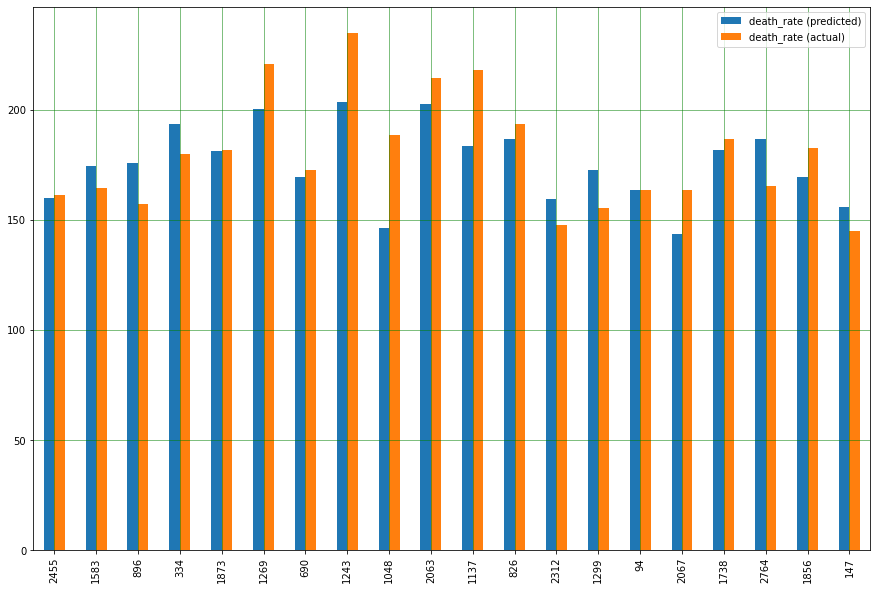

In [23]:
## Visualisasi hasil prediksi 
data = data[['death_rate (predicted)', 'death_rate (actual)']]       # Mengambil atribut actual dan predicted saja dari dataframe
df_temp = data.head(20)
df_temp.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET_deathRate'>

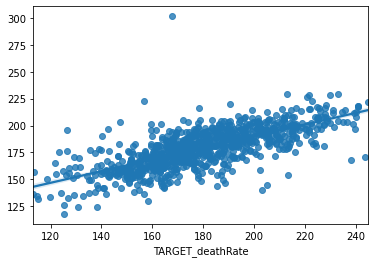

In [24]:
# jawaban a. plot perbandingan y test dan y prediction
sns.regplot(y_test,y_pred)

### Nomor 2
[15] Implementasikan Ridge Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [26]:
pipe = make_pipeline(StandardScaler(), Ridge(alpha=0.01))
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.01))])

In [27]:
pred_train_rr= pipe.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= pipe.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

16.51388128779009
0.5664926981471896
17.573803391377407
0.4995967914096502


In [28]:
pipe = make_pipeline(StandardScaler(), Ridge(alpha=100000))
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100000))])

In [29]:
pred_train_rr= pipe.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= pipe.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

23.867355122803396
0.09446197766646514
23.728533316598394
0.08771538946787993


Saat alpha meningkat, kompleksitas model berkurang. Menaikkan tingkat alpha bisa mengurangi overfitting, bahkan hingga membuatnya menjadi underfitting. Membuat alpha menjadi infinity bisa membuat weight model menjadi 0. Dapat dilihat mean squared errornya semakin meningkat dan koefisien determinasinya menjadi berkurang saat alpha pada kasus ini dinaikkan yang berarti model regresi menjadi kurang dapat memprediksi nilai target secara signifikan

### Nomor 3
[15] Implementasikan Lasso Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


NOTE: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [30]:
# from sklearn.preprocessing import scale 

# alphas = 10**np.linspace(10,-2,100)*0.5

# lasso = Lasso(max_iter = 10000, normalize = True)
# coefs = []

# for a in alphas:
#     lasso.set_params(alpha=a)
#     lasso.fit(scale(X_train), y_train)
#     coefs.append(lasso.coef_)
    
# ax = plt.gca()
# ax.plot(alphas*2, coefs)
# ax.set_xscale('log')
# plt.axis('tight')
# plt.xlabel('alpha')
# plt.ylabel('weights')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [32]:
lasso = Lasso(max_iter = 10000, alpha=0.01)
pipe = make_pipeline(StandardScaler(), lasso)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, max_iter=10000))])

In [33]:
pred_train_lasso= pipe.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= pipe.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

16.5176504531378
0.5662947862037675
17.40614186589211
0.5090993618533637


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

lasso = Lasso(max_iter = 10000, alpha=10)
pipe = make_pipeline(StandardScaler(), lasso)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, max_iter=10000))])

In [35]:
pred_train_lasso= pipe.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= pipe.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

24.244227574921332
0.06563878148796554
24.1596243289213
0.054266195524586114


Saat alpha meningkat, kompleksitas model berkurang. Menaikkan tingkat alpha bisa mengurangi overfitting, bahkan hingga membuatnya menjadi underfitting. Membuat alpha menjadi infinity bisa membuat weight model menjadi 0. Dapat dilihat mean squared errornya semakin meningkat dan koefisien determinasinya menjadi berkurang saat alpha pada kasus ini dinaikkan yang berarti model regresi menjadi kurang dapat memprediksi nilai target secara signifikan

## Logistic and Softmax Regression

### Nomor 1
[15] Implementasikan Logistic Regression dengan target yang digunakan adalah kolom TARGET_logistic. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat (baca method .score() pada dokumentasi sklearn)


In [36]:
X = cancer_df.drop(["TARGET_logistic", "TARGET_deathRate", "TARGET_softmax"], axis=1).select_dtypes(exclude="object")
y = cancer_df[["TARGET_logistic"]]

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [38]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

In [39]:
# fit the model with data
pipe.fit(X_train,y_train.values.ravel())
y_pred=pipe.predict(X_test)

In [40]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[375,  96],
       [104, 320]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

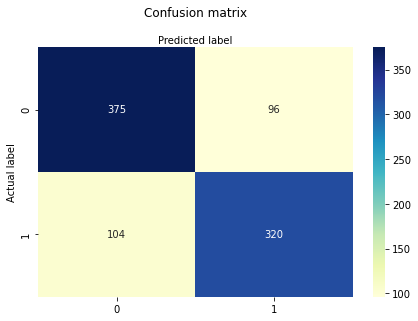

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.776536312849162
Precision: 0.7828810020876826
Recall: 0.7961783439490446


### Nomor 2
[15] Implementasikan Softmax Regression dengan target yang digunakan adalah kolom TARGET_softmax. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat.


In [43]:
X = cancer_df.drop(["TARGET_logistic", "TARGET_deathRate", "TARGET_softmax"], axis=1).select_dtypes(exclude="object")
y = cancer_df["TARGET_softmax"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', max_iter=10000))
pipe.fit(X_train, y_train)  # apply scaling on training data


pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.6558659217877095

In [45]:
y_pred = pipe.predict(X_test)

In [46]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[108,  65,   7],
       [ 61, 285,  78],
       [  8,  89, 194]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

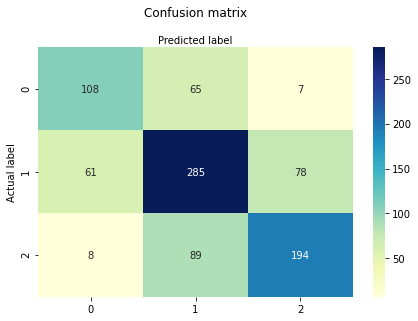

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
# Membuat classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.60      0.61       180
           2       0.65      0.67      0.66       424
           3       0.70      0.67      0.68       291

    accuracy                           0.66       895
   macro avg       0.65      0.65      0.65       895
weighted avg       0.66      0.66      0.66       895

